# Handwritten digits classification using artificial neural **network(ANN)**

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model **improves**

Here is a small example for recognizing digit. We call the model as Handwritten Digit classification. You can run the code below, block by block. The best way to learn is by doing

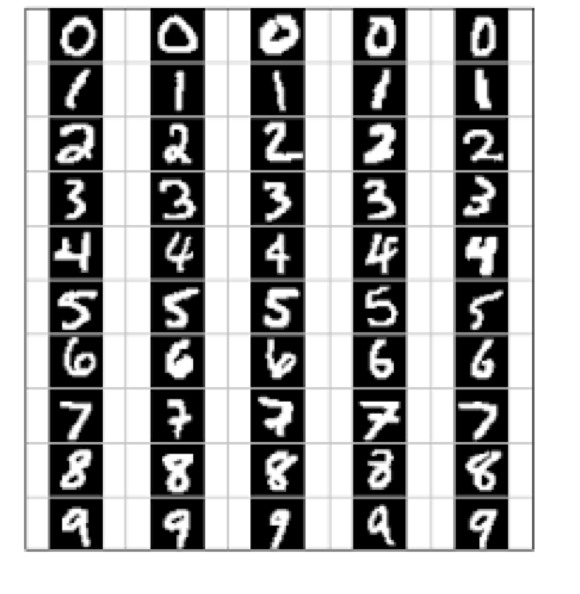

# **Theory**

TensorFlow: model tracking for 
 
Matplotlib: to plot graphs Keras: API for TensorFlow

Tensor§ow.keras.models: to build a machine learning model. 
We will import Sequential ( a stack of layers with only one input tensor and one output tensor).

Sklearn.model: to split the data into a training set and a test set Tensor§ow.keras.layers: importing different layers to implement deep learning.

The description of the layers is mentioned below – Dense: creating feed-forward neural networks, meaning that every input and every output is dependent reciprocally.

Flatten: serializing multi-dimensional tensor.

# IMPORTING REQUIRED PACKAGES AND LIBRARIES

In [ ]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

# LOAD AND SPLIT DATASET
Here we will load data and we will reshape so that every image will be of same shape.

total = 700000 images

training=60000 imagea

testing= 10000 images

In [ ]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data() 
TrainIn = TrainIn.reshape(60000,28,28,1)
TestIn = TestIn.reshape(10000,28,28,1) 
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(TrainIn) # total no. images in training

60000

In [ ]:
len(TestIn)  # total no. images in testing

10000

# VISUALIZE THE DATA

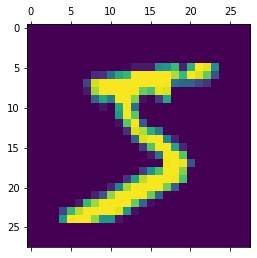

In [ ]:
plt.matshow(TrainIn[0])

# BUILDING A DEEP NEURAL NET

In [ ]:
Handwritten_digits_classifier = Sequential() 

# Add Flatten/Dense Layers
Handwritten_digits_classifier.add(Flatten(name='F1'))

Handwritten_digits_classifier.add(Dense(100, activation='softmax',name='D1'))

Handwritten_digits_classifier.add(Dense(100, activation='softmax',name='D2'))

Handwritten_digits_classifier.add(Dense(10, activation='softmax',name='D3'))

In [ ]:
Handwritten_digits_classifier.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [ ]:
TrainingLog=Handwritten_digits_classifier.fit(TrainIn, TrainOut,epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 11s 4ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 6/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy: 0.1113
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900 - val_accuracy

In [86]:
print(Handwritten_digits_classifier.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 F1 (Flatten)                (None, 784)               0         
                                                                 
 D1 (Dense)                  (None, 100)               78500     
                                                                 
 D2 (Dense)                  (None, 100)               10100     
                                                                 
 D3 (Dense)                  (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


#VISUALIZING THE GRAPH OF LOSS AND ACCURACY

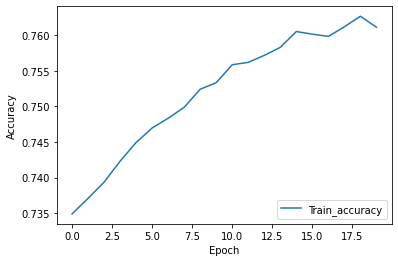

In [89]:
plt.plot(TrainingLog.history['accuracy'], label='Train_accuracy')
#plt.plot(TrainingLog.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(loc='lower right')


# Testing the Model

In [90]:
Handwritten_digits_classifier.evaluate(TestIn, TestOut)

313/313 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.7644


[0.04672114923596382, 0.7644000053405762]

so we got 76% accuracy on model. you can try out different things to increase the accuracy.

1) try differnt optimizer

2) try different loss function

2) try different activation function and so.

# TRY OUT SOME PREDICTIONS

1/1 [==============================] - 0s 26ms/step
1


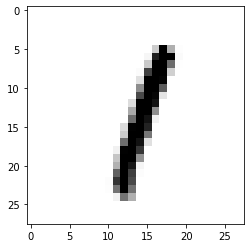

In [91]:
image_index = 5
plt.imshow(TestIn[image_index].reshape(28, 28),cmap='Greys')
pred = Handwritten_digits_classifier.predict(TestIn[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Change the image index in the above cell and check whether prediction and actual image labelling matches .

# Summarize your observation

In [92]:
predicted_classes1 = Handwritten_digits_classifier.predict(TestIn)
predicted_classes1=tf.argmax(predicted_classes1,axis=1) 
predicted_classes1

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [93]:
actual1 = tf.argmax(TestOut,axis=1) 
actual1

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

# CONFUSION MATRIX

Text(69.0, 0.5, 'Truth')

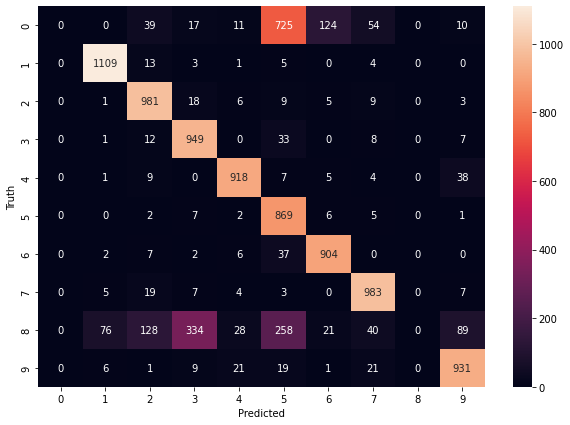

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(actual1, predicted_classes1)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')